In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
from xgboost import XGBClassifier

In [3]:
Data=pd.read_csv('HR.csv')

In [4]:
Data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
Data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
#checking for null values
Data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [10]:
#checking for duplicate values
Data.duplicated().sum()

3008

In [11]:
Data.shape

(14999, 10)

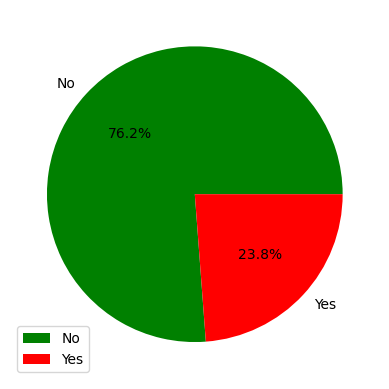

In [13]:
#checking the attrition rate using pie chart
y=Data['left'].value_counts()
colors=['green','red']
labels=['No','Yes']
plt.pie(y,labels=labels,colors=colors,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

#From this pie chart we can see that the percentage of Attrition rate is comparitively less. 16.1% is the attrition rate

KeyError: 'Age'

#From this plot it is visible that most of the workforce lies between the Age group of 30 to 40

In [ ]:
#Checking the Department in which attrition rate is huge
sns.countplot(x='Department',data=Data,hue='Attrition')

#The Attrition Rate is more in the Research and Development Department. whereas the Attrition Rate is very Less in the HR department

In [ ]:
#checking the daily rate according to education
sns.jointplot(x='Education',y='MonthlyIncome',data=Data)

#From this plot we can see that more number of graduates becomes a huge part of the workforce.

In [ ]:
#checking which age group leaves the company 
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='Age',data=Data,hue='Attrition',ax=ax)

#Here we can see that the Attrition rate is more for people in the Age group 29 to 31.

In [ ]:
fig,ax=plt.subplots(figsize=(5, 5))
sns.countplot(x='Gender',data=Data,hue='JobSatisfaction',ax=ax)

In [ ]:
sns.countplot(x='Gender',data=Data,hue='Attrition')

#The Attrition rate among Males is More than Females.

In [ ]:
y=Data['JobSatisfaction'].value_counts()
labels=['4','3','1','2']
plt.subplot(1,2,1)
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Job satifaction of employees')

y=Data['EnvironmentSatisfaction'].value_counts()
labels=['3','4','2','1']
plt.subplot(1,2,2)
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Environment satifaction of employees')

plt.subplots_adjust(wspace=0.4)
plt.show()

#The rating of Job Satisfaction among the employees is 4 only 19.1% are dissatisfied with their job

#Thr rating of work environment satifaction is 3 only 19.3% are dissatisfied with the work Environment.

#We can understand that More number of employees are satisfied or partially satisfied with the work environment and job

In [ ]:
Data.sort_values(by='YearsAtCompany',ascending=False).head(10)[['YearsAtCompany','PercentSalaryHike','PerformanceRating']]

In [ ]:
sns.lineplot(x='YearsAtCompany',y='PercentSalaryHike',data=Data,ci=None)

#From this plot we can see that the percentage of salary hike does not depend on number of years. So we also check the performance scale of employees with Highest salary hike

In [ ]:
sns.lineplot(x='PerformanceRating',y='PercentSalaryHike',data=Data)

#Here we can see that the percentage of hike in salary only depends upon Performance of the Employee.

In [ ]:
 fig,ax = plt.subplots(1,1, figsize = (20,12))
sns.heatmap(Data.corr(),annot=True)
plt.show()

KEY FINDINGS

From the pie chart we can see that the percentage of Attrition rate is comparitively less. 16.1% is the attrition rate

It is visible that most of the workforce lies between the Age group of 30 to 40

The Attrition Rate is more in the Research and Development Department. whereas the Attrition Rate is very Less in the HR department

we can see that more number of graduates becomes a huge part of the workforce.

The Attrition rate is more for people in the Age group 29 to 31.

The Attrition rate among Males is More than Females.

The rating of Job Satisfaction among the employees is 4 only 19.1% are dissatisfied with their job

The rating of work environment satifaction is 3 only 19.3% are dissatisfied with the work Environment.

We can understand that More number of employees are satisfied or partially satisfied with the work environment and job

The percentage of salary hike does not depend on number of years. So we also check the performance scale of employees with Highest salary hike.

the percentage of hike in salary only depends upon Performance of the Employee

In [ ]:
le=LabelEncoder()
lst=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','OverTime','MaritalStatus','Over18']
for i in lst:
  Data[i]=le.fit_transform(Data[i])
     

In [ ]:
Data.dtypes

In [ ]:
# separate a y-variable from the DataFrame
y = Data.Attrition
# y
# update the baseline DataFrame minus the y-variable
X = Data.drop(['Attrition'], axis=1)
# X

In [ ]:
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)   

In [ ]:
# split data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3)

print("data is split into training and validation sub-datasets")

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

In [ ]:
from pandas._libs.tslibs.offsets import MonthEnd
Knn=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
rs=RandomForestClassifier(n_estimators=50)
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
lg=LogisticRegression()
models=[Knn,nb,sv,dt,rs,ad,gb,xgb,lg]

for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred,digits = 4))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("_"*100)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
CV_score_lr=cross_val_score(LogisticRegression(max_iter=1000),X,y,cv=5)

In [ ]:
print(CV_score_lr)

In [ ]:
mean_accuracy_lr=sum(CV_score_lr)/len(CV_score_lr)

In [ ]:
mean_accuracy_lr=mean_accuracy_lr*100

In [ ]:
mean_accuracy_lr=round(mean_accuracy_lr,2)


In [ ]:
print(mean_accuracy_lr)